<a href="https://www.kaggle.com/code/rathinvaradharajan/house-prediction-nn?scriptVersionId=94943379" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/austin-housing-data/austinHousingData.csv


In [2]:
file_path = '/kaggle/input/austin-housing-data/austinHousingData.csv'
house_price_df = pd.read_csv(file_path)

## Droping unnecessary columns:

In [3]:
ignore_features = ['zpid', 'numOfPhotos', 'homeImage', 'streetAddress', 'description', 'latestPriceSource', 'latest_saledate', 'latest_salemonth']
house_price_df.drop(columns=ignore_features, inplace=True)

## Engineering non-number features:

In [4]:
house_price_df['hasAssociation'] = house_price_df['hasAssociation'] * 1
house_price_df['hasGarage'] = house_price_df['hasGarage'] * 1
house_price_df['hasCooling'] = house_price_df['hasCooling'] * 1
house_price_df['hasHeating'] = house_price_df['hasHeating'] * 1
house_price_df['hasSpa'] = house_price_df['hasSpa'] * 1
house_price_df['hasView'] = house_price_df['hasView'] * 1

In [5]:
house_price_df['city'].replace(['road', 'del valle', 'pflugerville', 'manor', 'manchaca', 'driftwood', 'dripping springs', 'austin', 'west lake hills'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

In [6]:
house_price_df["age"] = house_price_df["yearBuilt"].max() - house_price_df["yearBuilt"]
house_price_df.drop(columns=["yearBuilt"], inplace=True)

house_price_df['homeType'].replace(['Mobile / Manufactured', 'Multiple Occupancy', 'Residential', 'Single Family', 'MultiFamily', 'Townhouse',  'Apartment', 'Condo', 'Vacant Land', 'Other'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

house_price_df['latest_saleyear'] = house_price_df['latest_saleyear'].max() - house_price_df['latest_saleyear']

house_price_df.head()

,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,age
0,3,78660,30.430632,-97.663078,1.98,2,1,1,1,1,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,8
1,3,78660,30.432673,-97.661697,1.98,2,1,1,1,1,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,7
2,3,78660,30.409748,-97.639771,1.98,0,1,1,0,1,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2
3,3,78660,30.432112,-97.661659,1.98,2,1,1,1,1,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,7
4,3,78660,30.437368,-97.656860,1.98,0,1,1,0,1,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,18


## Determining Correlation between data

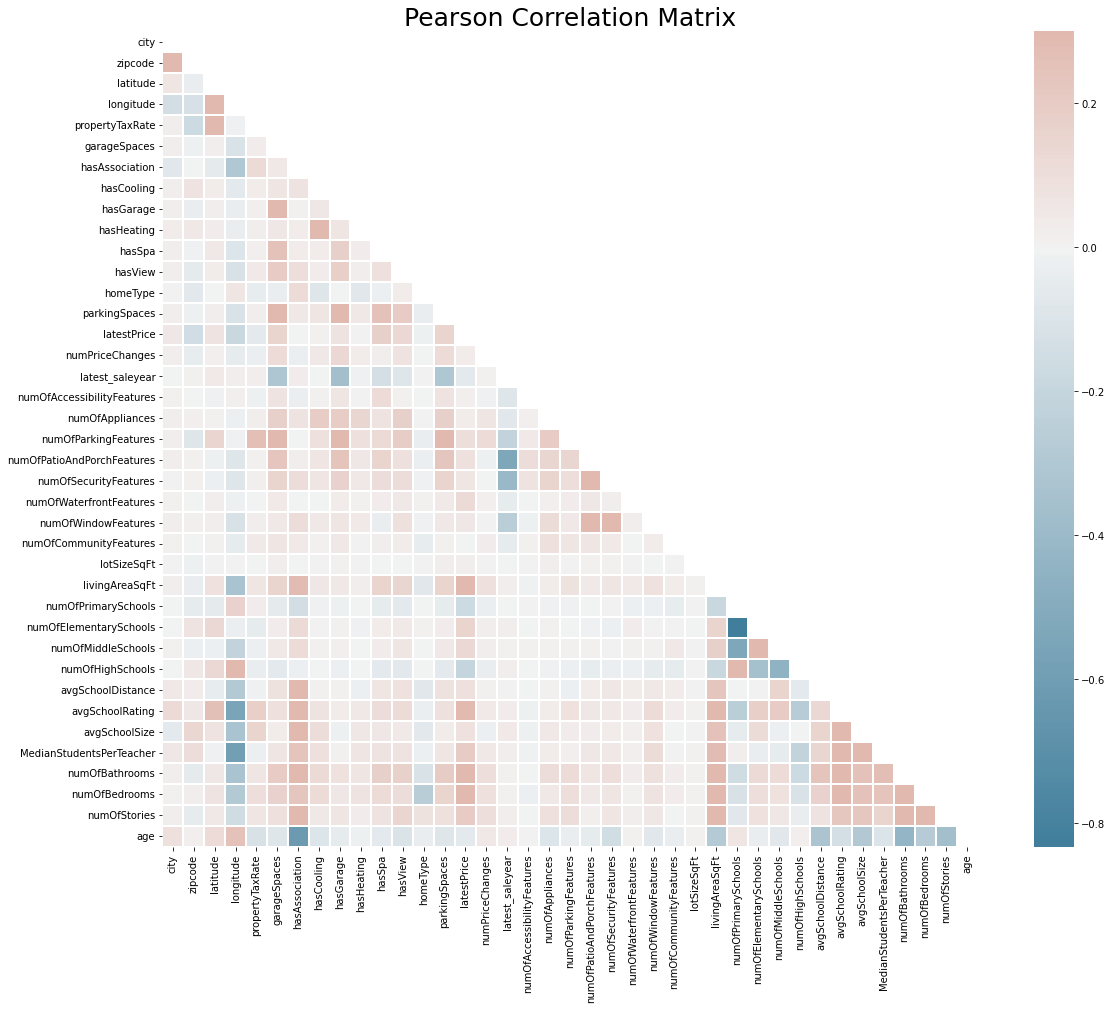

In [7]:
features = house_price_df.columns

corr = house_price_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Pearson Correlation Matrix', fontsize=25)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.1, cbar_kws={"shrink": 1})
                #, annot=True, annot_kws={'size':8})

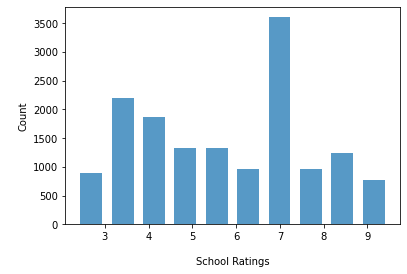

In [8]:
year_built = house_price_df['avgSchoolRating']
plt.hist(year_built, 10, alpha=0.75, rwidth=0.7)
plt.xlabel('\nSchool Ratings')
plt.ylabel('\nCount')
plt.show()

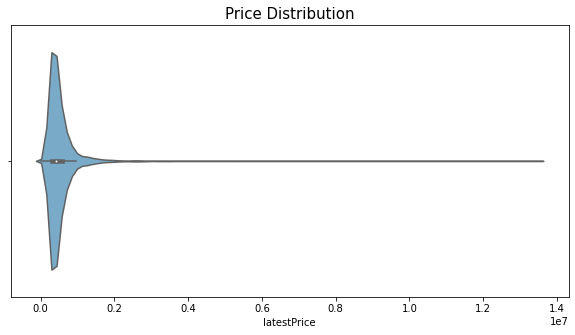

In [9]:
_, axes = plt.subplots(1,1, figsize=(10,5))
sns.violinplot(x=house_price_df['latestPrice'], ax=axes, palette="Blues_r")
_ = axes.set_title('Price Distribution', fontsize=15)

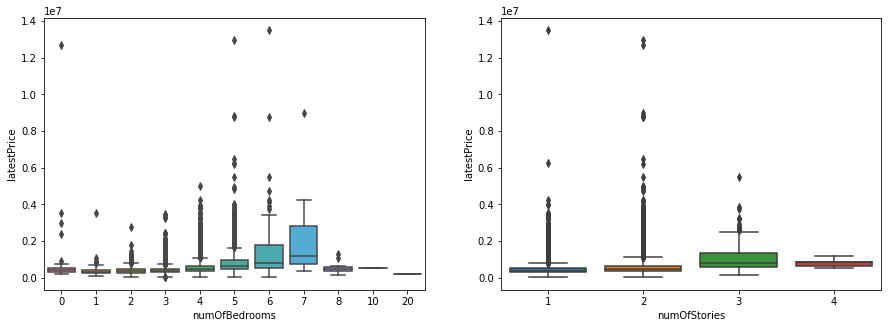

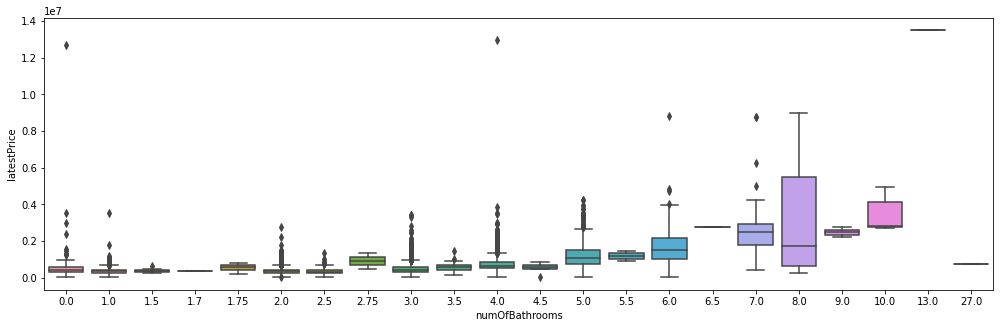

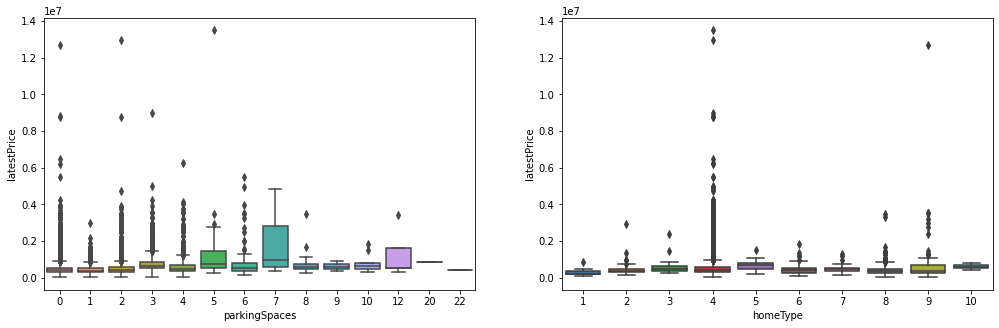

In [10]:
_, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x=house_price_df['numOfBedrooms'], y=house_price_df['latestPrice'], ax=axes[0])
sns.boxplot(x=house_price_df['numOfStories'], y=house_price_df['latestPrice'], ax=axes[1])

_, axes = plt.subplots(1,1, figsize=(17,5))
sns.boxplot(x=house_price_df['numOfBathrooms'], y=house_price_df['latestPrice'], ax=axes)

_, axes = plt.subplots(1,2, figsize=(17,5))
sns.boxplot(x=house_price_df['parkingSpaces'], y=house_price_df['latestPrice'], ax=axes[0])
_ = sns.boxplot(x=house_price_df['homeType'], y=house_price_df['latestPrice'], ax=axes[1])

In [11]:
from scipy import stats

house_price_df = house_price_df[(np.abs(stats.zscore(house_price_df)) < 3).all(axis=1)]

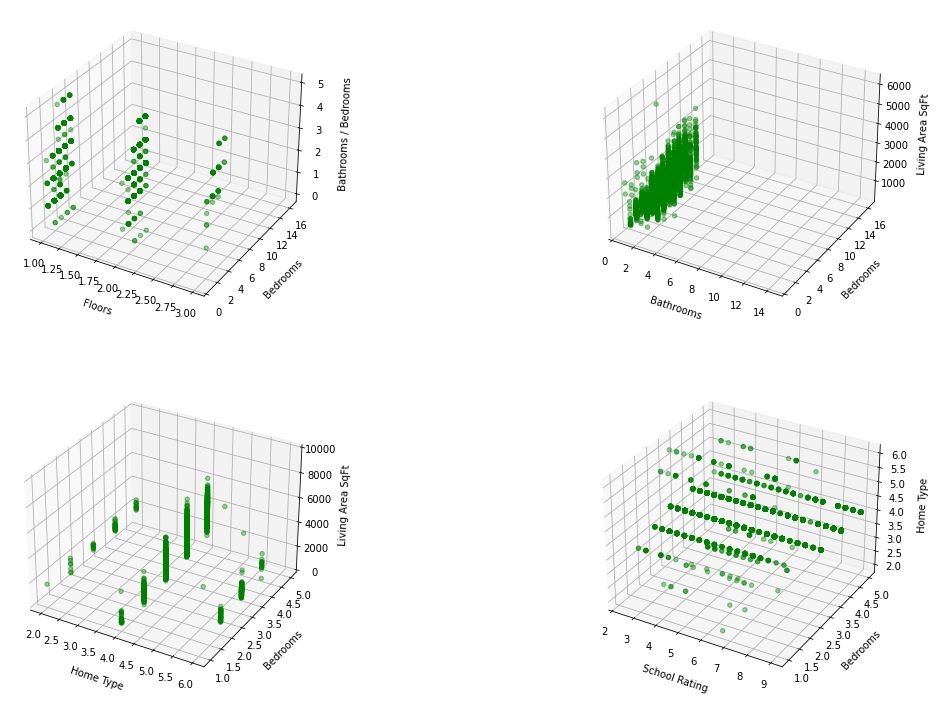

In [12]:
fig = plt.figure(figsize=(19,12.5))
ax = fig.add_subplot(2,2,1, projection="3d")
ax.scatter(house_price_df['numOfStories'],house_price_df['numOfBedrooms'],house_price_df['numOfBathrooms'], c="g",alpha=.4)
ax.set(xlabel='\nFloors', ylabel='\nBedrooms', zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,17])

ax = fig.add_subplot(2,2,2, projection="3d")
ax.scatter(house_price_df['numOfBathrooms'],house_price_df['numOfBedrooms'],house_price_df['livingAreaSqFt'], c="g",alpha=.4)
ax.set(xlabel='\nBathrooms', ylabel='\nBedrooms', zlabel= '\nLiving Area SqFt')
ax.set(xlim=[0,15])
ax.set(ylim=[0,17])

ax = fig.add_subplot(2,2,3, projection="3d")
ax.scatter(house_price_df['homeType'],house_price_df['numOfBedrooms'],house_price_df['livingAreaSqFt'], c="g",alpha=.4)
ax.set(xlabel='\nHome Type', ylabel='\nBedrooms', zlabel='\nLiving Area SqFt')
ax.set(zlim=[0,10000])

ax = fig.add_subplot(2,2,4, projection="3d")
ax.scatter(house_price_df['avgSchoolRating'], house_price_df['numOfBedrooms'], house_price_df['homeType'], c="g",alpha=.4)
_ = ax.set(xlabel='\nSchool Rating', ylabel='\nBedrooms', zlabel= '\nHome Type')

## Selecting Features for model training

In [13]:
features_columns = [1,5,10,11,12,13,22,26,30,32,34,35,36,37,38]
price_columns = [14]

print(features)

house_price_df.iloc[:, features_columns]

Index(['city', 'zipcode', 'latitude', 'longitude', 'propertyTaxRate',
       'garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage',
       'hasHeating', 'hasSpa', 'hasView', 'homeType', 'parkingSpaces',
       'latestPrice', 'numPriceChanges', 'latest_saleyear',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'age'],
      dtype='object')


,zipcode,garageSpaces,hasSpa,hasView,homeType,parkingSpaces,numOfWaterfrontFeatures,livingAreaSqFt,numOfHighSchools,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,age
24,78725,2,0,0,4,2,0,1534.0,1,3.000000,13,3.0,3,1,21
27,78725,2,0,0,4,2,0,1652.0,1,3.000000,13,2.0,3,1,8
29,78747,2,0,0,4,2,0,2350.0,1,3.333333,14,2.0,3,1,50
30,78744,2,0,0,4,2,0,1634.0,1,3.666667,12,2.0,3,1,4
32,78725,0,0,0,4,0,0,1399.0,1,3.000000,13,2.0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161,78756,0,0,0,4,0,0,1209.0,1,7.000000,16,1.0,3,1,79
15162,78756,0,0,0,4,0,0,1008.0,1,7.000000,16,1.0,2,1,68
15168,78704,2,0,0,4,2,0,1524.0,1,5.000000,13,3.0,3,2,84
15169,78722,0,0,0,5,0,0,6068.0,1,6.666667,15,2.0,4,1,52


In [14]:
learning_rate = 0.01
batch_size = 100
num_epochs = 100

### Splitting Test and Validation data

In [15]:
from sklearn.model_selection import train_test_split

x = house_price_df.iloc[:, features_columns]
y = house_price_df.iloc[:, price_columns]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.30, random_state=5)

### Defining Models and Data loaders

In [16]:
import torch
from torch.utils.data import Dataset, DataLoader

class House_Price_Dataset(Dataset):
    def __init__(self, x_df, y_df):
        x = x_df.values
        y = y_df.values
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y= torch.tensor(y,dtype=torch.float32)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

In [17]:
train_loader = DataLoader(House_Price_Dataset(x_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(House_Price_Dataset(x_test, y_test), batch_size=batch_size, shuffle=True)

validation_loader = DataLoader(House_Price_Dataset(x_val, y_val), batch_size=batch_size, shuffle=True)

In [18]:
from torch import nn

class House_Price_Model(nn.Module):
    def __init__(self, layers):
        super(House_Price_Model, self).__init__()
        network_layers = []
        for i in range(1, len(layers)):
            network_layers.append(nn.Linear(layers[i-1], layers[i]))
            if i != len(layers)-1:
                network_layers.append(nn.ReLU())
        self.model = nn.Sequential(*network_layers)
        
    def forward(self, x):
        out = self.model(x)
        return out

In [19]:
input_size = len(features_columns)
output_size = 1

global_state = { 'min_loss': float('inf'), 'trained_model': None}

In [20]:
def train_model(model, criterion, train_loss_acc = [], val_loss_acc = []):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):
        train_loss = 0
        model.train()
        for _, (data, actual_prices) in enumerate(train_loader):
            optimizer.zero_grad()
            predicted = model(data)
            loss = criterion(actual_prices, predicted)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0)
        train_loss /= len(train_loader.dataset)
        train_loss_acc.append(train_loss)

        model.eval()
        validation_loss = 0
        for _, (data, actual_prices) in enumerate(validation_loader):
            optimizer.zero_grad()
            predicted = model(data)
            _val_loss = criterion(actual_prices, predicted)
            validation_loss += _val_loss.item() * data.size(0)
        validation_loss /= len(validation_loader.dataset)
        val_loss_acc.append(validation_loss)
        
        if validation_loss < global_state['min_loss']:
            global_state['min_loss'] = validation_loss
            global_state['trained_model'] = model
            
    print(f'Training Loss: {train_loss}')
    print(f'Validation Loss: {_val_loss}')
    return model, train_loss_acc, val_loss_acc

In [21]:
training_losses = []
validation_losses = []

## Training Model with Different Loss functions

### Training with MSE Loss (128x64x32x16 neurons):

In [22]:
layers = [input_size, 128, 64, 32, 16, output_size]

mse_model = House_Price_Model(layers)
criterion = nn.MSELoss()
mse_model, _train_loss, _val_loss = train_model(mse_model, criterion, [], [])

training_losses.append({ 'color': 'r--', 'values': _train_loss, 'loss': 'MSE Loss'})
validation_losses.append({ 'color': 'r', 'values': _val_loss, 'loss': 'MSE Loss'})


Training Loss: 34238539932.038094
Validation Loss: 9896358912.0


### Training with L1 Loss (256x64x32x16 neurons):

In [23]:
layers = [input_size, 256, 64, 32, 16, output_size]

l1_model = House_Price_Model(layers)
criterion = nn.L1Loss()
l1_model, _train_loss, _val_loss = train_model(l1_model, criterion, [], [])

training_losses.append({ 'color': 'g--', 'values':  _train_loss, 'loss': 'L1 Loss'})
validation_losses.append({ 'color': 'g', 'values': _val_loss, 'loss': 'L1 Loss'})

Training Loss: 113250.45282738096
Validation Loss: 134382.34375


### Training with Huber Loss (256x128x64x32x16 neurons):

In [24]:
layers = [input_size, 256, 128, 64, 32, 16, output_size]

huber_model = House_Price_Model(layers)
criterion = nn.HuberLoss()
huber_model, _train_loss, _val_loss = train_model(huber_model, criterion, [], [])

training_losses.append({ 'color': 'b--', 'values':  _train_loss, 'loss': 'Huber Loss'})
validation_losses.append({ 'color': 'b', 'values': _val_loss, 'loss': 'Huber Loss'})

Training Loss: 114930.37842261905
Validation Loss: 157079.84375


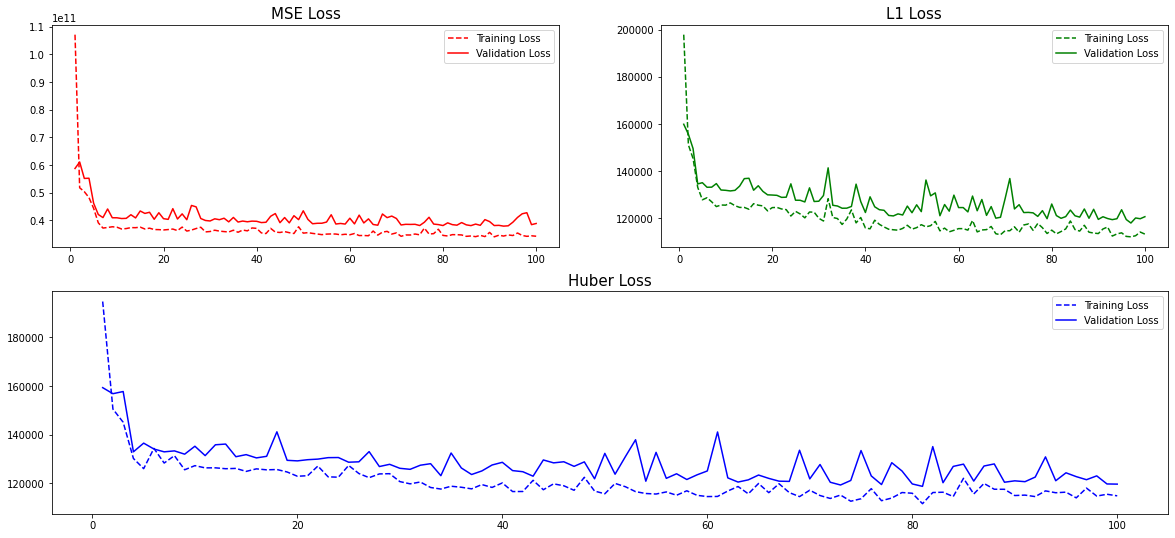

In [25]:
plt.figure(figsize=(20,9))
ax1 = plt.subplot(212)
ax2 = plt.subplot(221)
ax3 = plt.subplot(222)
ax = [ax2, ax3, ax1]
for i in range(len(training_losses)):
    entry = training_losses[i]
    ax[i].plot([i+1 for i in range(num_epochs)], entry['values'], entry['color'], label='Training Loss')
    entry = validation_losses[i]
    ax[i].plot([i+1 for i in range(num_epochs)], entry['values'], entry['color'], label='Validation Loss')
    ax[i].set_title(entry['loss'], fontsize=15)
    ax[i].legend()
plt.show()

## Training Models with different architecture and learning rates

In [26]:
training_losses[2]['model'] = '256x128x64x32x16'
training_losses = [training_losses[2]]
validation_losses[2]['model'] = '256x128x64x32x16'
validation_losses = [validation_losses[2]]

### Training with 1 layer (12 neurons):

In [27]:
layers = [input_size, 12, output_size]

model = House_Price_Model(layers)
criterion = nn.HuberLoss()
_, _train_loss, _val_loss = train_model(model, criterion, [], [])

training_losses.append({ 'color': 'g', 'values':  _train_loss, 'model': '12'})
validation_losses.append({ 'color': 'g', 'values': _val_loss, 'model': '12'})

Training Loss: 122210.28303571428
Validation Loss: 116560.234375


### Training with 3 hidden layers (64x32x16 neurons):

In [28]:
layers = [input_size, 64, 32, 16, output_size]

model = House_Price_Model(layers)
criterion = nn.HuberLoss()
_, _train_loss, _val_loss = train_model(model, criterion, [], [])

training_losses.append({ 'color': 'm', 'values':  _train_loss, 'model': '64x32x16'})
validation_losses.append({ 'color': 'm', 'values': _val_loss, 'model': '64x32x16'})

Training Loss: 114369.61116071428
Validation Loss: 133156.578125


### Training with 2 hidden layers (258x64 neurons):

In [29]:
layers = [input_size, 258, 64, output_size]

two_layer_model = House_Price_Model(layers)
criterion = nn.HuberLoss()
_, _train_loss, _val_loss = train_model(two_layer_model, criterion, [], [])

training_losses.append({ 'color': 'r', 'values':  _train_loss, 'model': '258x64'})
validation_losses.append({ 'color': 'r', 'values': _val_loss, 'model': '258x64'})

Training Loss: 114805.67477678572
Validation Loss: 119721.1015625


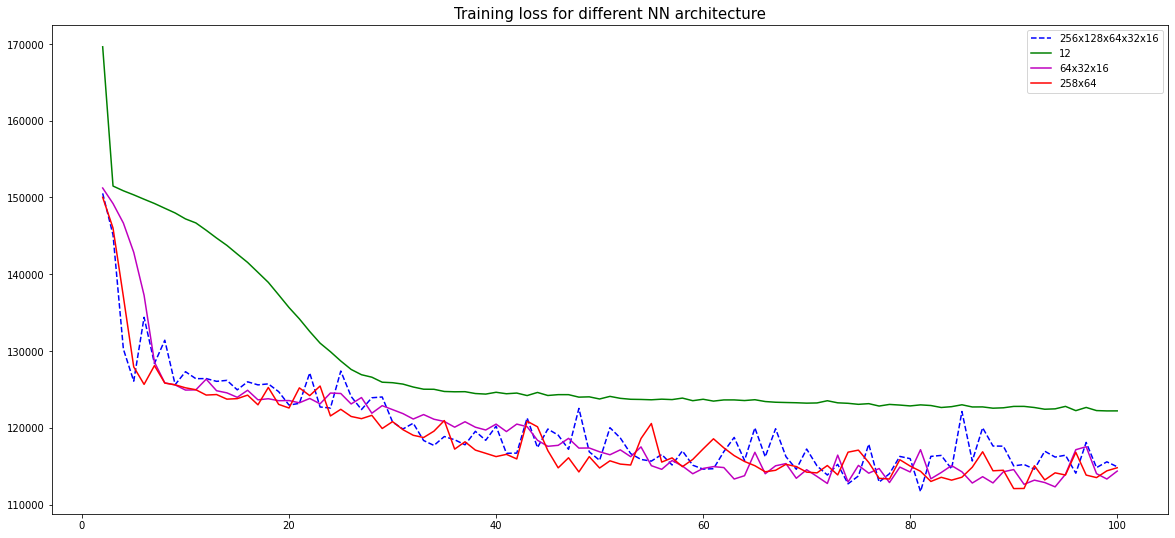

In [30]:
plt.figure(figsize=(20,9))
for i in range(len(training_losses)):
    entry = training_losses[i]
    plt.plot([i+1 for i in range(1,num_epochs)], entry['values'][1:], entry['color'], label=entry['model'])
plt.legend()
plt.title('Training loss for different NN architecture', fontsize=15)
plt.show()

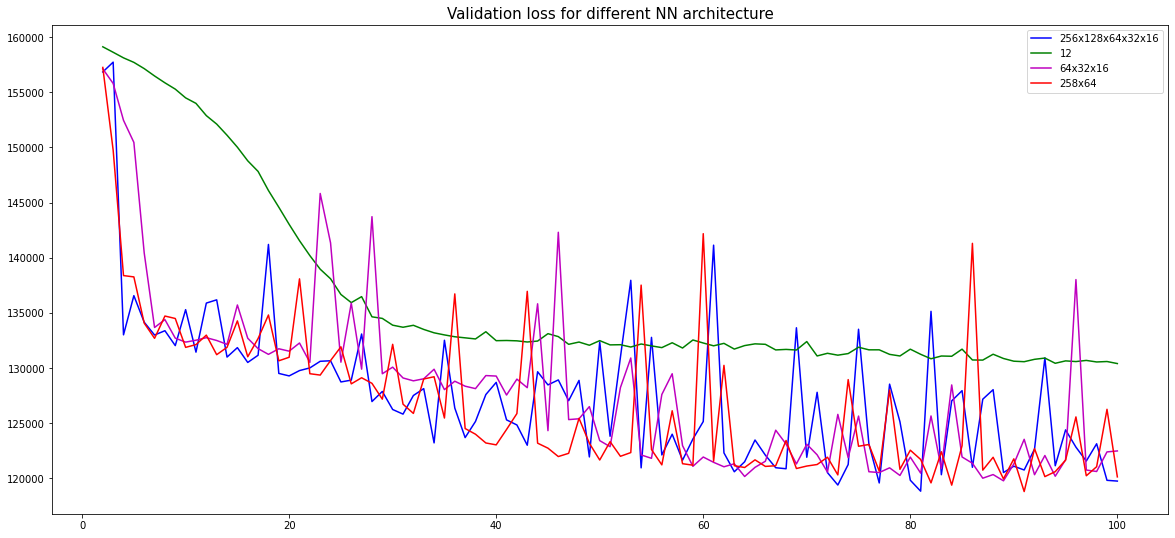

In [31]:
plt.figure(figsize=(20,9))
for i in range(len(validation_losses)):
    entry = validation_losses[i]
    plt.plot([i+1 for i in range(1, num_epochs)], entry['values'][1:], entry['color'], label=entry['model'])
plt.legend()
plt.title('Validation loss for different NN architecture', fontsize=15)
plt.show()

## Evaluating the trained model

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

model = global_state['trained_model']
model.eval()

predicted = model(torch.tensor(x_train.values, dtype=torch.float32))
predicted = predicted.detach().numpy()
actual = y_train.values
print('\n============================== TRAINING ERRORs ==================================')
print(f'MS Error: {mean_squared_error(actual, predicted)}')
print(f'MA Error: {mean_absolute_error(actual, predicted)}')
print(f'R2 Error: {r2_score(actual, predicted)}')
print(f'Max Error: {max_error(actual, predicted)}')
print('================================================================================\n')

predicted = model(torch.tensor(x_val.values, dtype=torch.float32))
predicted = predicted.detach().numpy()
actual = y_val.values
print('\n============================== VALIDATION ERRORs ==================================')
print(f'MS Error: {mean_squared_error(actual, predicted)}')
print(f'MA Error: {mean_absolute_error(actual, predicted)}')
print(f'R2 Error: {r2_score(actual, predicted)}')
print(f'Max Error: {max_error(actual, predicted)}')
print('================================================================================\n')

predicted = model(torch.tensor(x_test.values, dtype=torch.float32))
predicted = predicted.detach().numpy()
actual = y_test.values
print('\n============================== TESTING ERRORs ==================================')
print(f'MS Error: {mean_squared_error(actual, predicted)}')
print(f'MA Error: {mean_absolute_error(actual, predicted)}')
print(f'R2 Error: {r2_score(actual, predicted)}')
print(f'Max Error: {max_error(actual, predicted)}')
print('================================================================================\n')


============================== TRAINING ERRORs ==================================
MS Error: 35382836426.31206
MA Error: 112237.45647916666
R2 Error: 0.33404502303059747
Max Error: 1313652.5625


============================== VALIDATION ERRORs ==================================
MS Error: 40829870852.021774
MA Error: 120637.63116392714
R2 Error: 0.31376554777318677
Max Error: 1304990.875


============================== TESTING ERRORs ==================================
MS Error: 34109902993.670845
MA Error: 111568.14144956024
R2 Error: 0.36919801508141614
Max Error: 1398356.6875

